In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import * 

In [2]:
df = pd.read_csv('df_train_pop.csv')

In [3]:
meta = pd.read_excel('./sdot_data/pop_location_meta.xlsx', header=2)
meta1 = meta[['사이트명','자치구']]
df1 = pd.merge(df, meta1, on=['사이트명'], how='left')
df1

,사이트명,날짜,방문자수,위도,경도,자치구
0,4027.0,2022-01-01 00:00:00,9.0,37.560536,126.854707,강서구
1,4027.0,2022-01-01 00:30:00,3.0,37.560536,126.854707,강서구
2,4027.0,2022-01-01 01:00:00,6.0,37.560536,126.854707,강서구
3,4027.0,2022-01-01 01:30:00,1.0,37.560536,126.854707,강서구
4,4027.0,2022-01-01 02:00:00,4.0,37.560536,126.854707,강서구
...,...,...,...,...,...,...
207355,4051.0,2022-03-31 21:30:00,25.0,37.550701,127.143013,강동구
207356,4051.0,2022-03-31 22:00:00,18.0,37.550701,127.143013,강동구
207357,4051.0,2022-03-31 22:30:00,33.0,37.550701,127.143013,강동구
207358,4051.0,2022-03-31 23:00:00,20.0,37.550701,127.143013,강동구


In [4]:
df1['사이트명'].nunique()

48

In [5]:
round(pd.DataFrame(df1['방문자수'].describe()).T, 3)

,count,mean,std,min,25%,50%,75%,max
방문자수,207360.0,30.706,50.118,0.0,2.0,10.0,39.0,613.0


In [6]:
df1['날짜'] = pd.to_datetime(df1['날짜'])
df1['요일'] = df1['날짜'].dt.dayofweek
df1['시간'] = df1['날짜'].dt.hour

Text(0.5, 1.0, 'Average floating population by day-of-week')

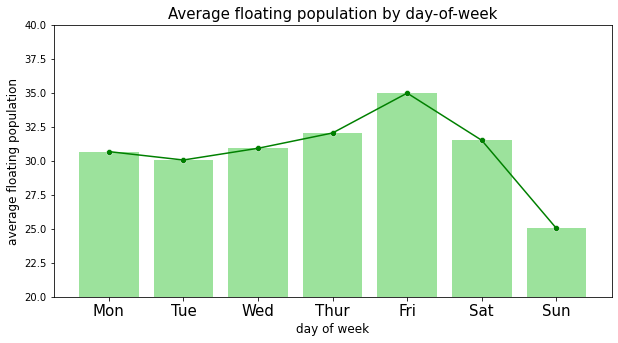

In [7]:
df_dayofweek = df1.groupby('요일').mean().reset_index()
# display(df_dayofweek)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='요일', y='방문자수', data=df_dayofweek, ax=ax, color='lightgreen')
sns.lineplot(x='요일', y='방문자수', data=df_dayofweek, ax=ax, color='green')
sns.scatterplot(x='요일', y='방문자수', data=df_dayofweek, ax=ax, color='green')

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=15)
ax.set(ylim=(20, 40))

ax.set_xlabel('day of week', fontsize=12)
ax.set_ylabel('average floating population', fontsize=12)
ax.set_title('Average floating population by day-of-week', fontsize=15)

Text(0.5, 1.0, 'Average floating population by Hour-of-day')

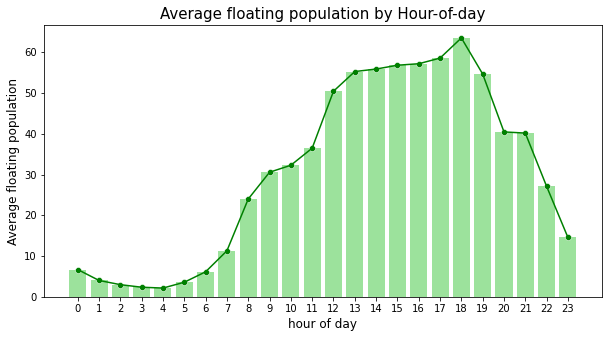

In [8]:
df_hour = df1.groupby('시간').mean().reset_index()

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='시간', y='방문자수', data=df_hour, ax=ax, color='lightgreen')
sns.lineplot(x='시간', y='방문자수', data=df_hour, ax=ax, color='green')
sns.scatterplot(x='시간', y='방문자수', data=df_hour, ax=ax, color='green')

ax.set_xticks(range(24))
# ax.set(ylim=(27, 33))
ax.set_xlabel('hour of day', fontsize=12)
ax.set_ylabel('Average floating population', fontsize=12)
ax.set_title('Average floating population by Hour-of-day', fontsize=15)

Text(0.5, 1.0, 'Timeseries plot of floating population')

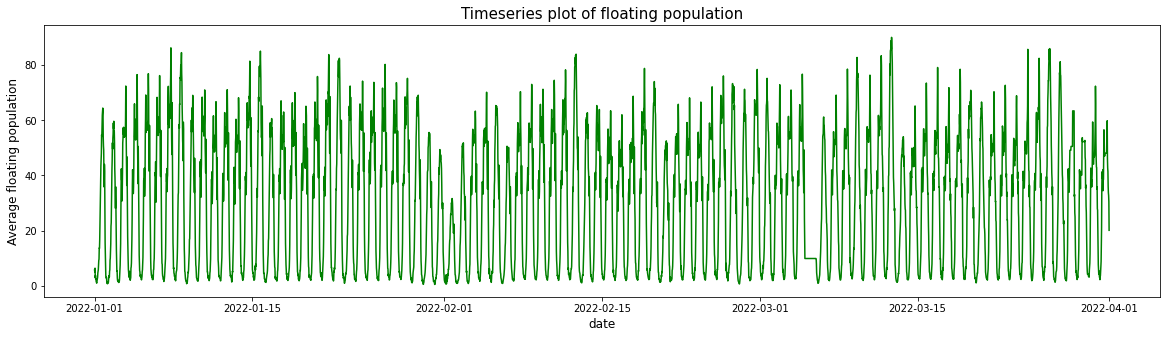

In [9]:
df_all = df1.groupby(['날짜']).mean().reset_index()

fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x='날짜', y='방문자수', data=df_all, ax=ax, color='green')
# ax.set_xticks(range(24))
ax.set_xlabel('date', fontsize=12)
ax.set_ylabel('Average floating population', fontsize=12)
ax.set_title('Timeseries plot of floating population', fontsize=15)

Text(0.5, 1.0, 'Timeseries plot of floating population')

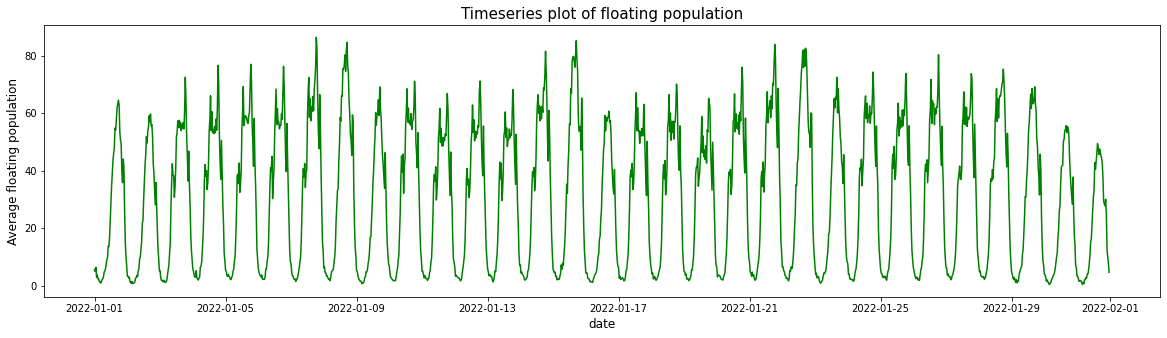

In [10]:
df_all = df1.groupby(['날짜']).mean().reset_index()

fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x='날짜', y='방문자수', data=df_all[:1488], ax=ax, color='green')
# ax.set_xticks(range(24))
ax.set_xlabel('date', fontsize=12)
ax.set_ylabel('Average floating population', fontsize=12)
ax.set_title('Timeseries plot of floating population', fontsize=15)

In [11]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [12]:
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=10.5)
meta2 = meta[['위도','경도']]
# Add  points to the map
for _, row in meta2.dropna().iterrows():
    folium.Circle(location = [row['위도'], row['경도']],
           radius = 200,
                  color='red'
#            popup=row['시설명'],
    ).add_to(m)

# Display the map
m